In [2]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
from single_data_processing import SingleAssetTI
import itertools
import yfinance as yf
from pso import PortfolioPSO
from model_comparator import ModelComparator
from island_ga import IslandGGA
from single_data_processing import SingleAssetTI

import datetime

In [3]:
#BITCOIN 
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2024, 12, 31)
period =2023
pSize = 150
num_iter =100
num_runs = 10
ticker = 'BIT-USD'


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


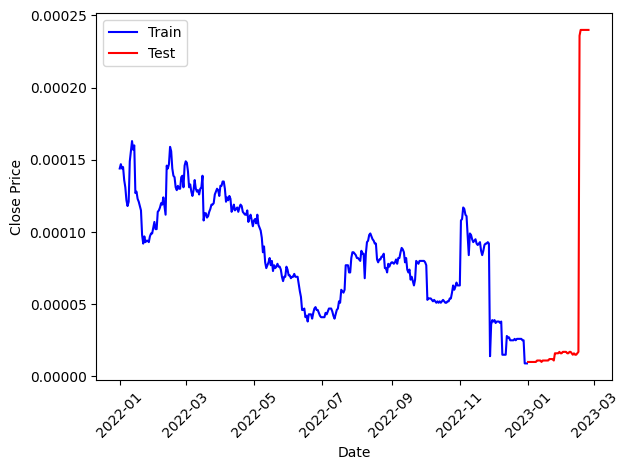

Running model:  ring
Running ring
Generation 1: Best fitness = 6.273631379234033  Average Fitness = 6.256692656460766
Generation 2: Best fitness = 6.273631379234033  Average Fitness = 6.268791744155953
Generation 3: Best fitness = 6.273631379234033  Average Fitness = 6.224796698561539
Generation 4: Best fitness = 6.273631379234033  Average Fitness = 6.271211561694991
Generation 5: Best fitness = 6.273631379234033  Average Fitness = 6.273631379234028
Island 0 Migration - Left 4 - Right 1
Island 1 Migration - Left 0 - Right 2
Island 2 Migration - Left 1 - Right 3
Island 3 Migration - Left 2 - Right 4
Island 4 Migration - Left 3 - Right 0
Generation 6: Best fitness = 6.273631379234033  Average Fitness = 6.273631379234028
Generation 7: Best fitness = 6.273631379234033  Average Fitness = 6.273631379234028
Generation 8: Best fitness = 6.273631379234033  Average Fitness = 6.271211561694991
Generation 9: Best fitness = 6.273631379234033  Average Fitness = 6.273631379234028
Generation 10: Best 

[*********************100%***********************]  1 of 1 completed


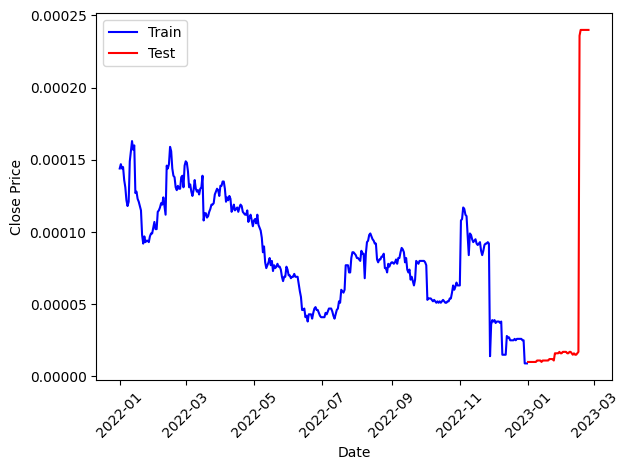

Running model:  ring
Running ring
Generation 1: Best fitness = 6.273631379234033  Average Fitness = 6.235322747309071
Generation 2: Best fitness = 6.273631379234033  Average Fitness = 6.271211561694991
Generation 3: Best fitness = 6.273631379234033  Average Fitness = 6.273631379234028
Generation 4: Best fitness = 6.273631379234033  Average Fitness = 6.273631379234028
Generation 5: Best fitness = 6.273631379234033  Average Fitness = 6.271211561694991
Island 0 Migration - Left 4 - Right 1
Island 1 Migration - Left 0 - Right 2
Island 2 Migration - Left 1 - Right 3
Island 3 Migration - Left 2 - Right 4
Island 4 Migration - Left 3 - Right 0
Generation 6: Best fitness = 6.273631379234033  Average Fitness = 6.273631379234028
Generation 7: Best fitness = 6.273631379234033  Average Fitness = 6.271211561694991
Generation 8: Best fitness = 6.273631379234033  Average Fitness = 6.273631379234028
Generation 9: Best fitness = 6.273631379234033  Average Fitness = 6.273631379234028
Generation 10: Best 

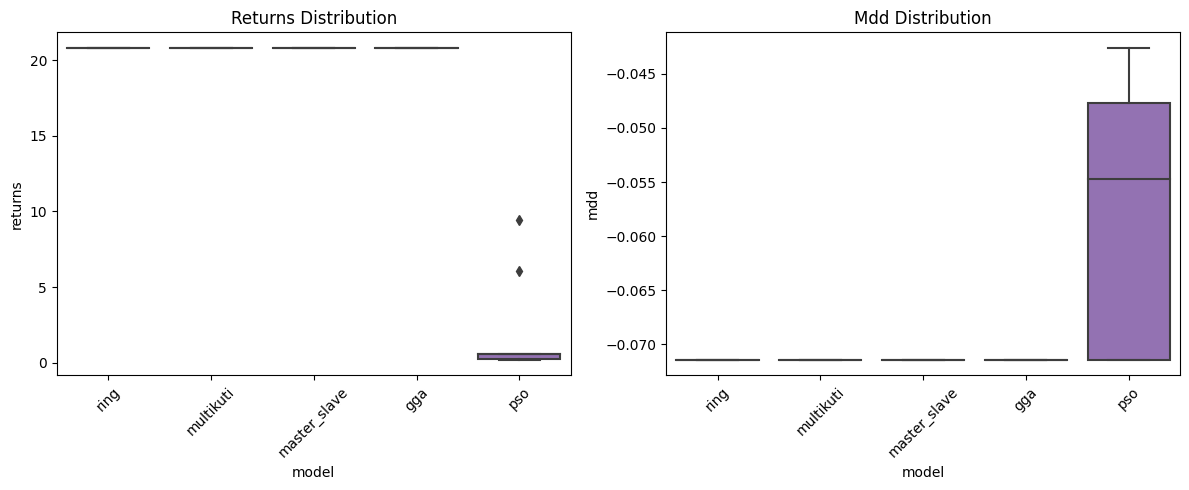

In [4]:
# Usage
import traceback

try:
    # Code that raises the error
    np.random.seed(42)
    comparator = ModelComparator(stock_ticker=ticker,period=period,start_date=start_date, end_date=end_date, pSize=pSize, num_iter=num_iter, num_runs=num_runs)
    comparator.run_comparison()
    results_df = comparator.run_comparison()
    comparator.plot_results(results_df, comparator.optimization_approaches)
    results_df.to_csv('results/bitcoin.csv')
        
except Exception as e:
    print("An error occurred:")
    traceback.print_exc()


In [5]:
results_df = pd.read_csv('results/bitcoin.csv')
pd.set_option('display.max_rows', None)
results_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,13.2962,-0.1569
master_slave,13.2962,-0.1569
multikuti,13.2962,-0.1569
pso,2.8217,-0.1134
ring,13.2962,-0.1569


In [6]:
training_df = results_df[results_df['phase'] == 'train']
training_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,5.7742,-0.2424
master_slave,5.7742,-0.2424
multikuti,5.7742,-0.2424
pso,3.7744,-0.1690
ring,5.7742,-0.2424


In [ ]:
training_df = results_df[results_df['phase'] == 'train']
training_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)
validation_df = results_df[results_df['phase'] == 'validation']
validation_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,20.6364,-0.0712
master_slave,20.8182,-0.0714
multikuti,20.8182,-0.0714
pso,0.8544,-0.0696
ring,20.8182,-0.0714


In [8]:
import pandas as pd

# --- Split train and validation ---
training_df = results_df[results_df['phase'] == 'train']
validation_df = results_df[results_df['phase'] == 'validation']

# --- Compute mean stats ---
train_stats = training_df.groupby('model')[['returns', 'mdd']].mean().round(4)
test_stats = validation_df.groupby('model')[['returns', 'mdd']].mean().round(4)

# --- Combine into a single DataFrame for LaTeX ---
rows = []
for model in train_stats.index:
    rows.append([model, 'Train', train_stats.loc[model, 'returns'], train_stats.loc[model, 'mdd']])
    rows.append([model, 'Test', test_stats.loc[model, 'returns'], test_stats.loc[model, 'mdd']])

latex_df = pd.DataFrame(rows, columns=['Method', 'Phase', 'Returns', 'MDD'])

# --- Generate LaTeX table ---
latex_code = r"""\begin{table}[H]
\centering
\caption{Performance of the proposed and compared approaches on the Bitcoin dataset.}
\label{tab:bitcoin_results}
\begin{tabular}{llrr}
\toprule
\multirow{2}{*}{Method} & \multirow{2}{*}{Phase} & Returns (\%) & MDD \\
\cmidrule{3-4}
& & Mean & Mean \\
\midrule
"""

for i, row in latex_df.iterrows():
    if i % 2 == 0:  # Start of a new model, use multirow
        latex_code += r"\multirow{2}{*}{" + str(row['Method']) + "} & " + row['Phase'] + \
                      f" & {row['Returns']} & {row['MDD']} \\\\\n"
    else:
        latex_code += f" & {row['Phase']} & {row['Returns']} & {row['MDD']} \\\\\n"
    if i % 2 == 1:
        latex_code += r"\midrule" + "\n"

latex_code += r"\bottomrule" + "\n" + r"\end{tabular}" + "\n" + r"\end{table}"

# --- Print LaTeX code ---
print(latex_code)


\begin{table}[H]
\centering
\caption{Performance of the proposed and compared approaches on the Bitcoin dataset.}
\label{tab:bitcoin_results}
\begin{tabular}{llrr}
\toprule
\multirow{2}{*}{Method} & \multirow{2}{*}{Phase} & Returns (\%) & MDD \\
\cmidrule{3-4}
& & Mean & Mean \\
\midrule
\multirow{2}{*}{gga} & Train & 5889092204.0424 & -0.807 \\
 & Test & 20.6364 & -0.0712 \\
\midrule
\multirow{2}{*}{master_slave} & Train & 5889092204.0424 & -0.807 \\
 & Test & 20.8182 & -0.0714 \\
\midrule
\multirow{2}{*}{multikuti} & Train & 5889092204.0424 & -0.807 \\
 & Test & 20.8182 & -0.0714 \\
\midrule
\multirow{2}{*}{pso} & Train & 3653392119.2278 & -0.7999 \\
 & Test & 0.8544 & -0.0696 \\
\midrule
\multirow{2}{*}{ring} & Train & 5889092204.0424 & -0.807 \\
 & Test & 20.8182 & -0.0714 \\
\midrule
\bottomrule
\end{tabular}
\end{table}
